In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

Create the Neural Network Model using nn.module

In [16]:
# Model to classify types of Irises
# there are 4 inputs and there are 3 outputs

class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)  # No softmax because CrossEntropyLoss expects raw logits
        return x



In [17]:
torch.manual_seed(41)
model = Model()

# Data Preprocessing
Split the dataset, extract the features and normalize if needed, and convert the labels into tensors using LongTensor()

In [18]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)

In [19]:
df.head()

iris = load_iris()
X = iris.data  # shape = (150, 4)
y = iris.target  # shape = (150,)

In [20]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(  # here i split 80-20
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Converting to tensors
# Note: The model expects float32 for inputs and long for targets
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)


Set the Loss Function and optimizer

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


# Train the model

In [22]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 100
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()          # Zero the gradient buffers
    y_pred = model(X_train_tensor) # Forward pass
    loss = criterion(y_pred, y_train_tensor)
    loss.backward()                # Backward pass
    optimizer.step()              # Update weights
    losses.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")



Epoch 10/100, Loss: 0.8921
Epoch 20/100, Loss: 0.6228
Epoch 30/100, Loss: 0.3595
Epoch 40/100, Loss: 0.2094
Epoch 50/100, Loss: 0.1227
Epoch 60/100, Loss: 0.0782
Epoch 70/100, Loss: 0.0595
Epoch 80/100, Loss: 0.0519
Epoch 90/100, Loss: 0.0480
Epoch 100/100, Loss: 0.0456


# Graph the losses per epoch

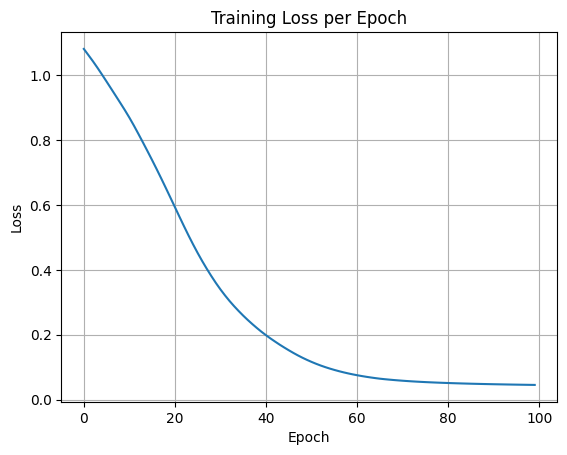

In [23]:
# Graph it out!

plt.plot(losses)
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


# Test the model on the test set

Test Accuracy: 96.67%


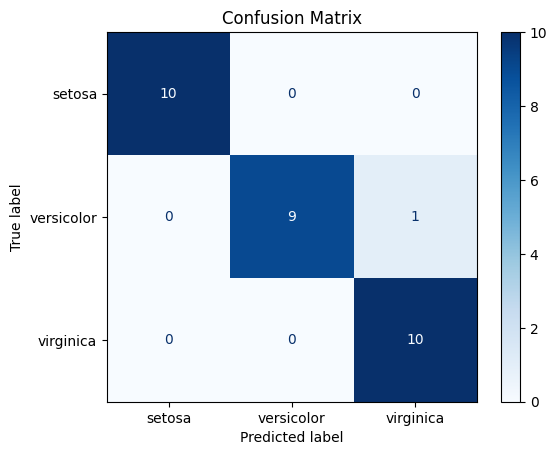

In [25]:

# Evaluate Model on Test Data Set (validate model on test set)

with torch.no_grad():
    y_test_pred = model(X_test_tensor)
    y_test_class = torch.argmax(y_test_pred, dim=1)

# Accuracy
acc = accuracy_score(y_test_tensor, y_test_class)
print(f"Test Accuracy: {acc * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test_tensor, y_test_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

